<a href="https://colab.research.google.com/github/roseanalytica/sales_prediction/blob/main/Sales_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big Mart Sales Prediction

In [2]:
# Dataset source: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

## Solution

In [3]:
# mount data   
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# import libraries  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Load the dataset  
filename = '/content/drive/MyDrive/01 COURSE/01 Coding Dojo/01 Colaboratory/01 Week 1/sales_predictions.csv'
df = pd.read_csv(filename)

In [6]:
 df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
#1) How many rows and columns?
print(df.shape)

(8523, 12)


In [8]:
#2) What are the datatypes of each variable?
print(df.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [9]:
#3) Are there duplicates? If so, drop any duplicates.
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool


In [10]:
#3.1 Drop duplicates 
df.drop_duplicates(inplace=True)


In [11]:
#4) Identify missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [12]:
df[['Item_Weight', 'Outlet_Size']].isna()


,Item_Weight,Outlet_Size
0,False,False
1,False,False
2,False,False
3,False,True
4,False,False
...,...,...
8518,False,False
8519,False,True
8520,False,False
8521,False,False


In [13]:
df[['Item_Weight', 'Outlet_Size']].isna().sum()

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [14]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).  
## Will be using interpolation since the missing values are relatively small in number and are likely to be missing at random.


In [15]:
##interpolation for Item_Weight 
df['Item_Weight'] = df['Item_Weight'].interpolate(method='linear')

In [16]:
##using forward fill since values available are cetegorical
df['Outlet_Size'] = df['Outlet_Size'].fillna(method='ffill')

In [17]:
#6) Confirm that there are no missing values after addressing them.
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [18]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
#reg to Regular, and #LF to Low Fat from Item_Fat_Content 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'reg': 'Regular', 'LF': 'Low Fat'})

In [19]:
print(df['Item_Fat_Content'].value_counts())


Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64


In [20]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

In [21]:
cols = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']
for col in cols:
    print(df[col].value_counts())


12.15000    88
17.60000    84
13.65000    78
11.80000    76
15.10000    71
            ..
12.77250     1
14.06125     1
10.99750     1
6.24750      1
13.87250     1
Name: Item_Weight, Length: 1443, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Typ

In [22]:
summary = df.describe().loc[['min', 'max', 'mean']].astype(int)
print(summary)

      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
min             4                0        31                       1985   
max            21                0       266                       2009   
mean           12                0       140                       1997   

      Item_Outlet_Sales  
min                  33  
max               13086  
mean               2181  


## Data Description

The dataset contains information on 8523 products across 1559 stores, and includes attributes such as item identifier, product category, product weight, store location, store establishment year, and more. The goal is to build a machine learning model that can accurately predict the sales of products in different stores.


In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<ipython-input-24-19507c356ac8>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


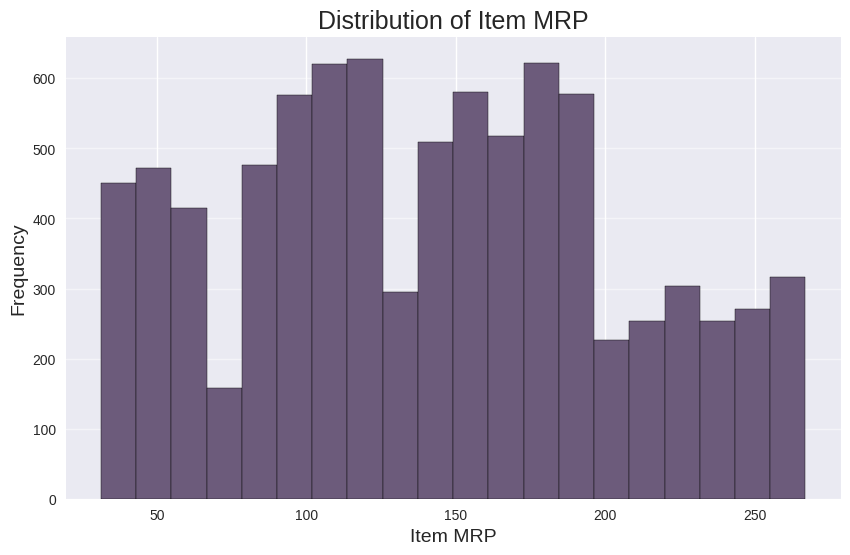

In [24]:
# Set style and color
plt.style.use('seaborn')
color = '#6c5b7b'

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create histogram
ax.hist(df['Item_MRP'], bins=20, color=color, edgecolor='black')

# Add titles and labels
ax.set_title('Distribution of Item MRP', fontsize=18)
ax.set_xlabel('Item MRP', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Add grid
ax.grid(axis='y', alpha=0.5)

# Show plot
plt.show()


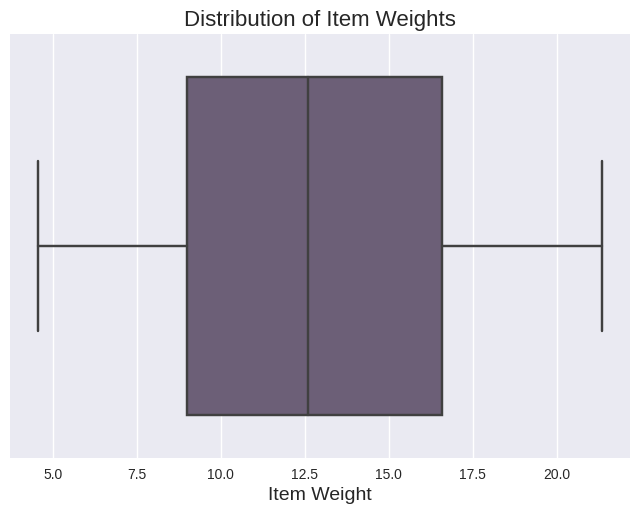

In [25]:
# Boxplot 
import seaborn as sns

sns.boxplot(x=df['Item_Weight'].dropna(), color='#6c5b7b')
plt.xlabel('Item Weight', fontsize=14)
plt.title('Distribution of Item Weights', fontsize=16)
plt.show()

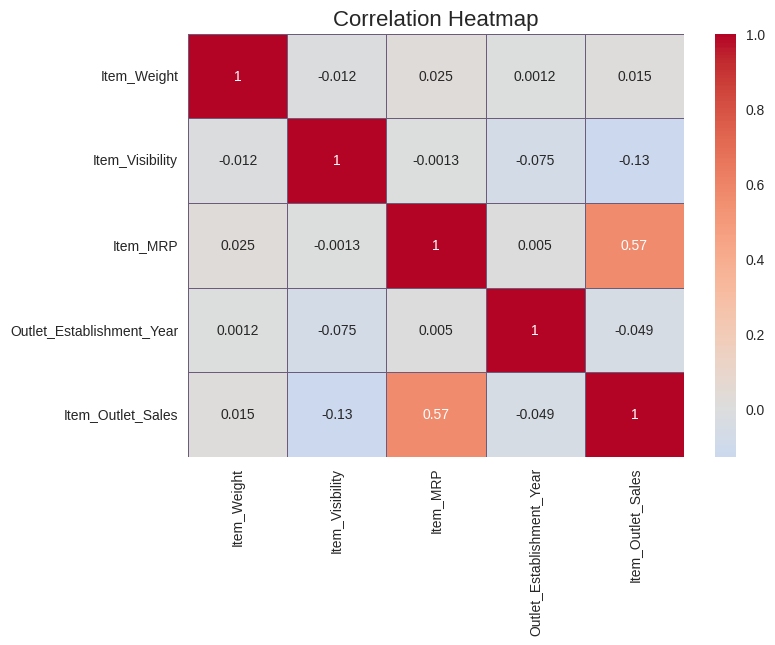

In [26]:
# Heatmap 
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='#6c5b7b')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

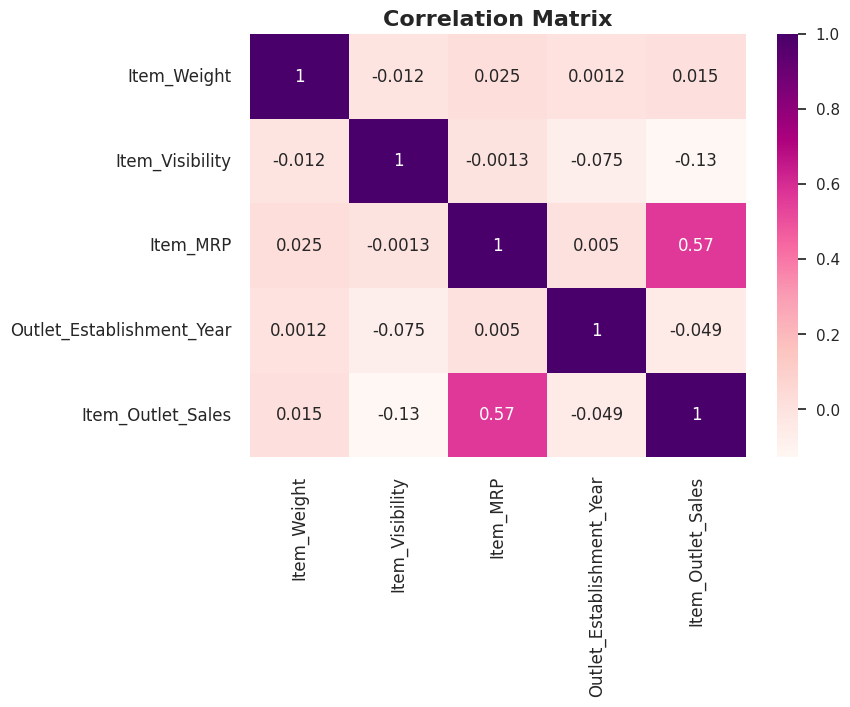

In [27]:
# Set style to match
sns.set(style='white')

# create correlation matrix
corr = df.select_dtypes(include=[np.number]).corr()

# create heatmap
sns.heatmap(corr, annot=True, cmap='RdPu')

# customize labels and title
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
